## Importing the basic Libraries 

In [2]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [3]:
df =pd.read_csv(r'C:\Users\DELL\Downloads\database_IND.csv')
df.head() ### Checking the dataset 

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
### Checking the dataset size
df.shape

(908, 25)

In [5]:
### Checking the null values in the data set.
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

### There more column who has mission values more than 40-99%. So, I am dropping those column who has null value more than 60% becasue if I will fill these column then there are more chance that this will mislead the accuracy score. 

In [6]:
threshold=0.6 ## Set the Threshold
df =df[df.columns[df.isnull().mean() < threshold]] 

### I seprate the dataset with those column who has missing value more than 60% .

In [7]:
### Cheking the missing values again 
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [8]:
df.head() ### Checking the updated dateset

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


### There are some column which has same value for all like - Country, Country_log, and also some column which dose has any relation with target like - name,gppd_idnr, Source, URL, generation_data_source, year_of_capacity_data and commissioning_year. So, I am going to drop these column and proceed further 

In [9]:
df.drop(columns=['country','country_long', 'name','gppd_idnr','source','geolocation_source','generation_data_source','url','commissioning_year','year_of_capacity_data'], inplace=True)
df.head()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [10]:
### Now again checking the missing value and deal with the missing values. 
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [11]:
### Checking the datatye of the dataset
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

### Time to filling the missing values. I am going to fill the all missing value with simpleImputer method as all values are continues value.

In [12]:
### Importing the simple imputer 
from sklearn.impute import SimpleImputer
s_i = SimpleImputer(missing_values = np.nan,strategy ='mean')
s_i = s_i.fit(df[['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
df[['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']] = s_i.transform(df[['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,Coal,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,Wind,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,Gas,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


In [13]:
### Checking the null is missing values ia available or not 
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

### All missing values filled but there is an categorical column primary_fuel. So, I am going to change this into interger with lable ecoder.

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])

In [15]:
### Again checking the dataset.
df.head()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,7,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


### Now the data set is free from missing values and categorical values. Now moving toward next step

## EDA

In [16]:
### Importing the basic visualization matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# First I build model for primary_fuel

1    259
3    250
6    127
7    123
2     69
0     50
5     21
4      9
Name: primary_fuel, dtype: int64


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

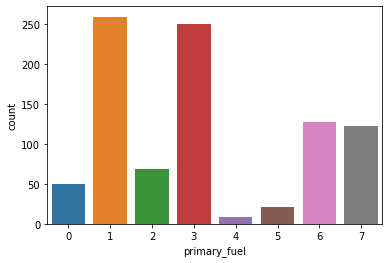

In [17]:
print(df['primary_fuel'].value_counts())
sns.countplot(x='primary_fuel', data=df)

### Distribution of primary fuel column is seems good. All features have continues value. So, we can plot scatter plots and checking the relation.

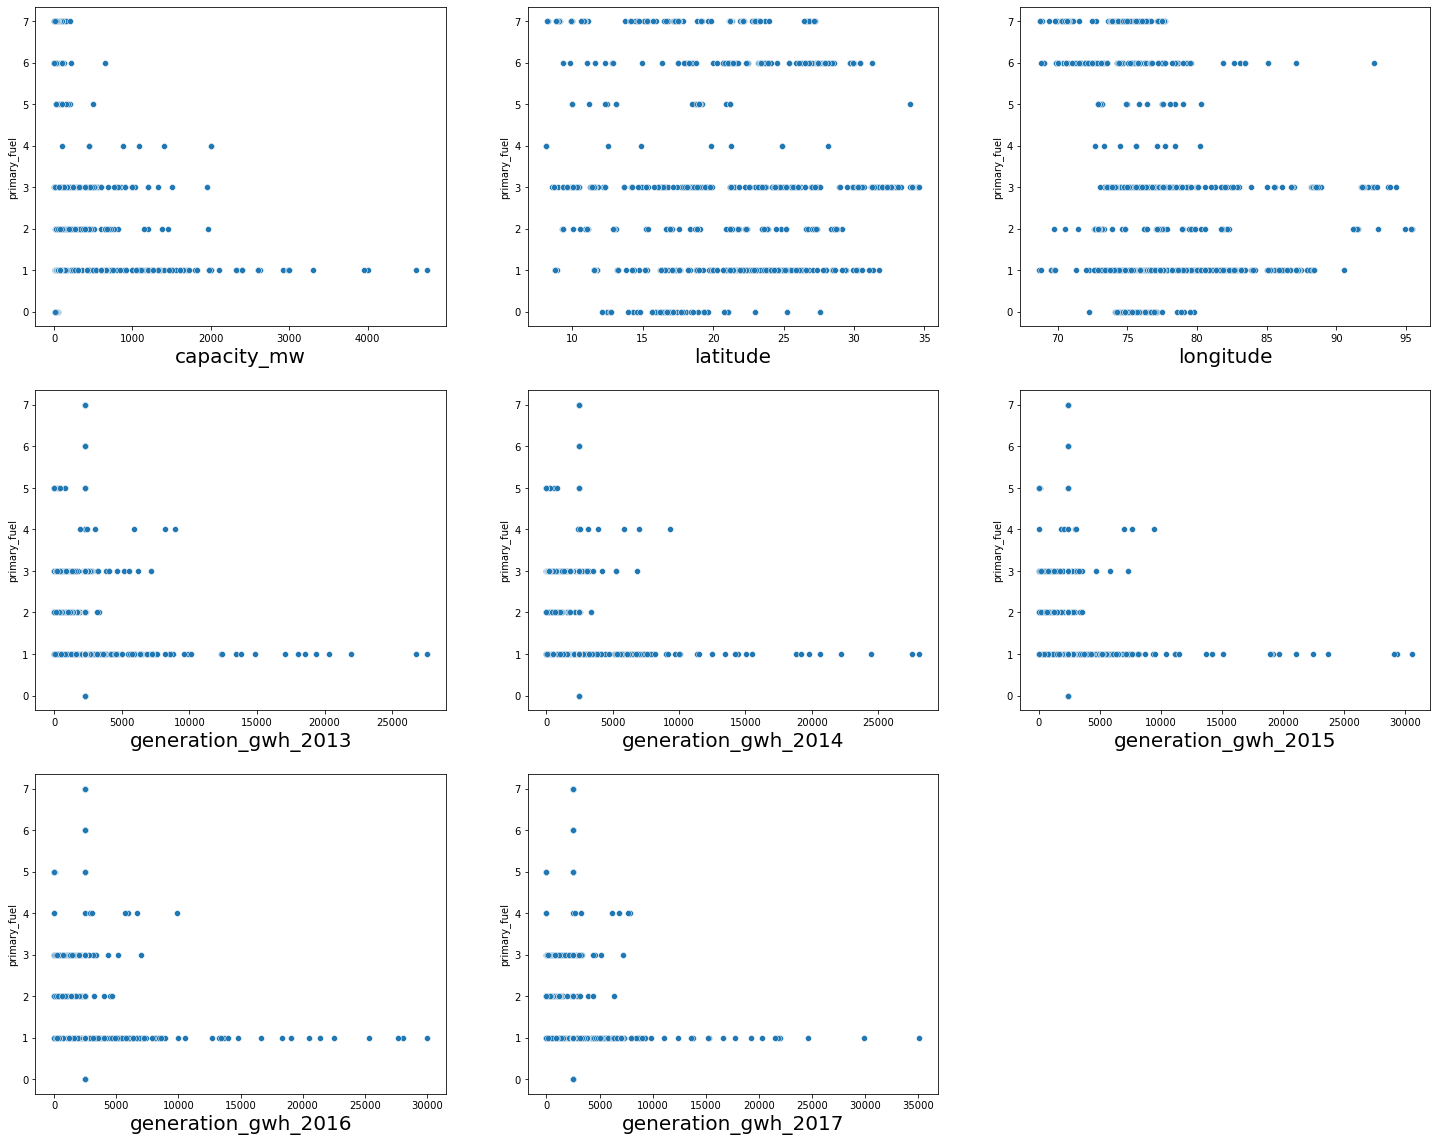

In [18]:
#### Plotting scatterplot to check the trend between features and target
x=df.drop(columns='primary_fuel')
y=df['primary_fuel']
plt.figure(figsize=(25,20))
pn=1
for column in x:
    if pn <= 9:
        plt.subplot(3,3, pn)
        sns.scatterplot(x[column],y )
        plt.xlabel(column, fontsize= 20)
    pn+=1
plt.show()

## Conclusion -

#### primary_fuel has good trend with capacity_mw.
#### primary_fuel has good trend with latitude.
#### primary_fuel has good trend with longitude.
#### primary_fuel has good trend with generation_gwh_2013.
#### primary_fuel has good trend with generation_gwh_2014.
#### primary_fuel has good trend with generation_gwh_2015.
#### primary_fuel has good trend with generation_gwh_2016.
#### primary_fuel has good trend with generation_gwh_2017.

### I can say from above conclusion that all the feature are directly related to 1 primary fuel value. 

### Checking the distribution of all the features and target

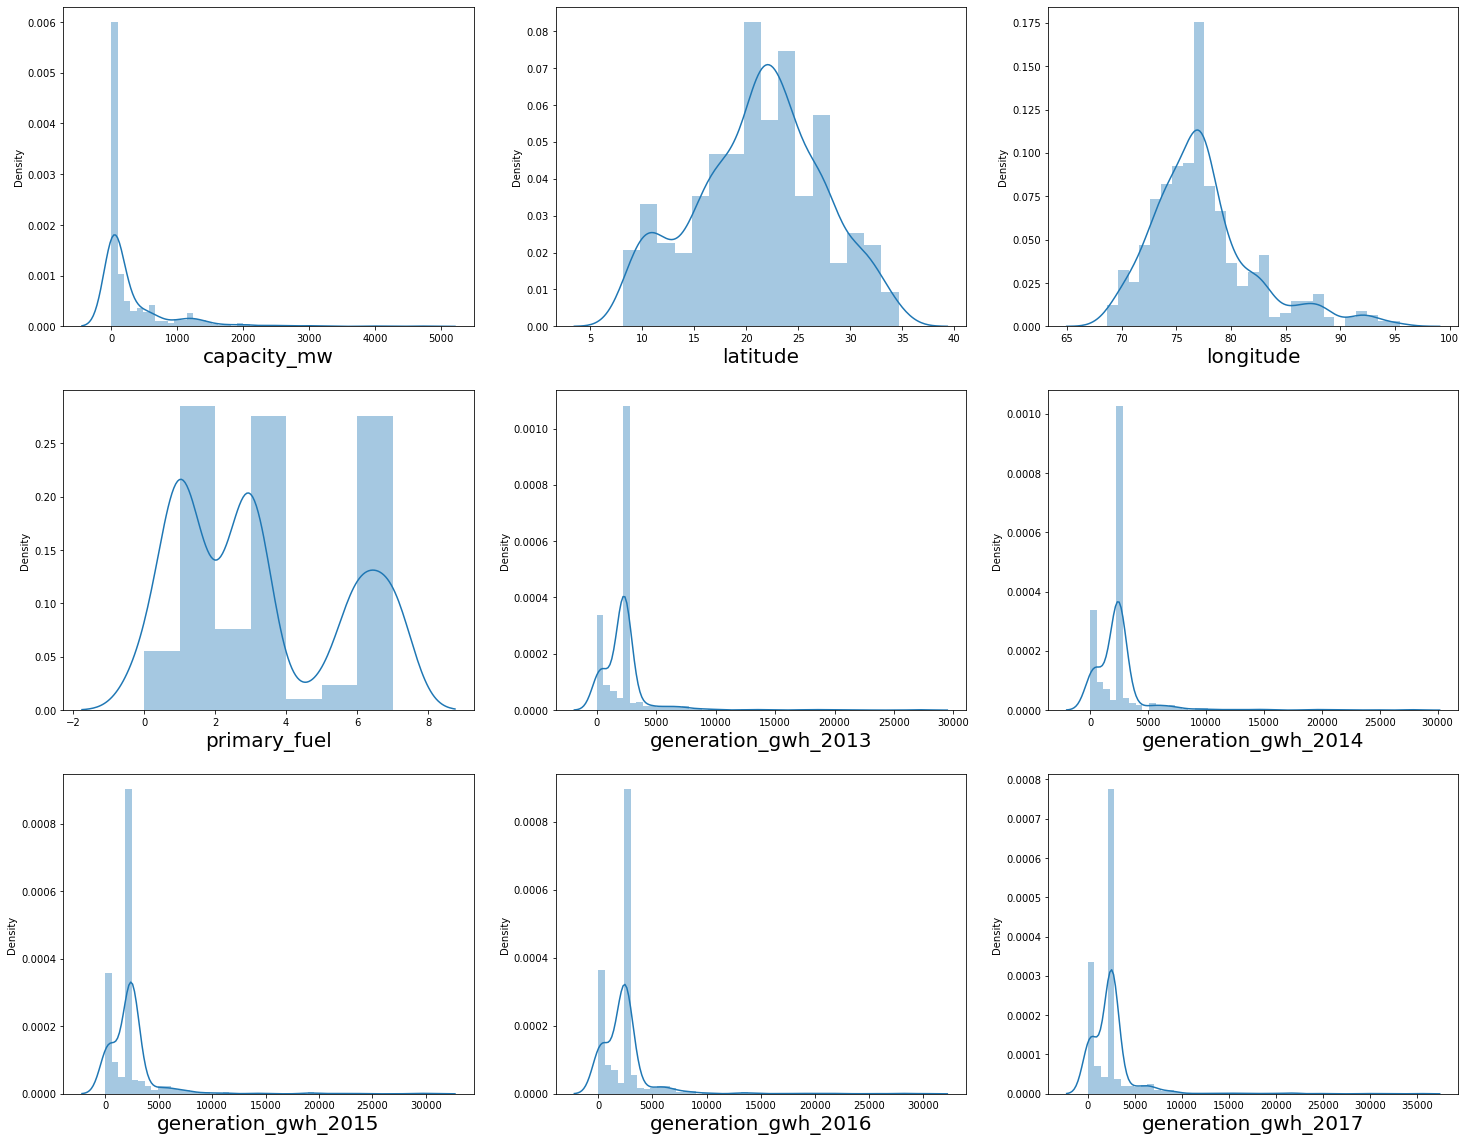

In [19]:
plt.figure(figsize=(25,20))
pn=1
for column in df:
    if pn <= 9:
        plt.subplot(3,3, pn)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize= 20)
    pn+=1
plt.show()

## Conclusion -

#### capacity_mw has normal distribution but right skewed.
#### latitude has good distribution.
#### longitude has good distribution.
#### Primary fuel is categorical values
#### generation_gwh_2013 has normal distribution but right skewed.
#### generation_gwh_2014 has normal distribution but right skewed.
#### generation_gwh_2015 has normal distribution but right skewed.
#### generation_gwh_2016 has normal distribution but right skewed.
#### generation_gwh_2017 has normal distribution but right skewed.

### I can say from above conclusion that all the feature has normal distribution but has some skewness which i can deal in skewness handling

## Checking the multicolinearity. 

<function matplotlib.pyplot.show(close=None, block=None)>

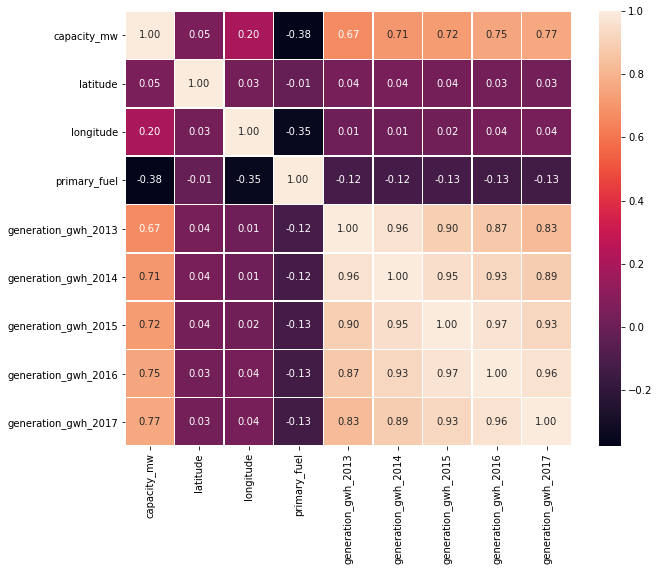

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

### 5 featues has multicollinearity with each other generation_gwh_2014,generation_gwh_2015,generation_gwh_2016 and generation_gwh_2017 has multicollinearity with each other with more than 90% but I can not drop any features as there are very less number of feathure present for building. 

### The target has maximum trend with - generation_gwh_2014(-38%)
### The target has minimum trend with - longitude(-1.0%)

### Every feature has not strong trend with target expect. So, I will keep all feature for Model building.

In [75]:
x.skew().sort_values()

latitude              -0.103418
primary_fuel           0.419751
longitude              0.864288
generation_gwh_2017    1.250408
generation_gwh_2015    1.328513
generation_gwh_2016    1.354065
generation_gwh_2014    1.441757
generation_gwh_2013    1.529639
dtype: float64

### We can see there are more features has skewness which is lies between - 1.2 to 1.5. I will fix this with help of power transform. Keeping the thresold value +/-0.5. 

In [22]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

x=pd.DataFrame(x_new, columns=x.columns)

In [76]:
x.skew()

latitude              -0.103418
longitude              0.864288
primary_fuel           0.419751
generation_gwh_2013    1.529639
generation_gwh_2014    1.441757
generation_gwh_2015    1.328513
generation_gwh_2016    1.354065
generation_gwh_2017    1.250408
dtype: float64

### Now the skewness is removed. Now I can move forward and check the stats of the model


<function matplotlib.pyplot.show(close=None, block=None)>

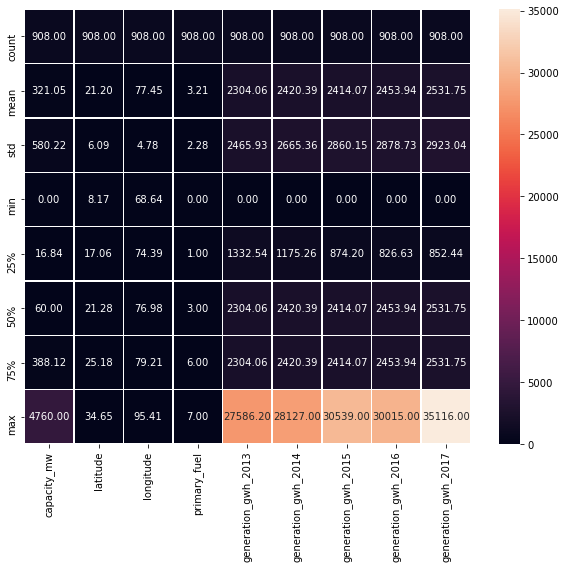

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.describe(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

In [25]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,3.205947,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.781201,2.281339,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.278850,76.978950,3.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,79.211600,6.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,95.408000,7.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


### Stats of the Dataset is not good as the minimum value of feature has very big difference with maximum value as well as 75% of values with maximum values. So, the stats is not good but I will deal with these in outliers section.

## Checking the outliers

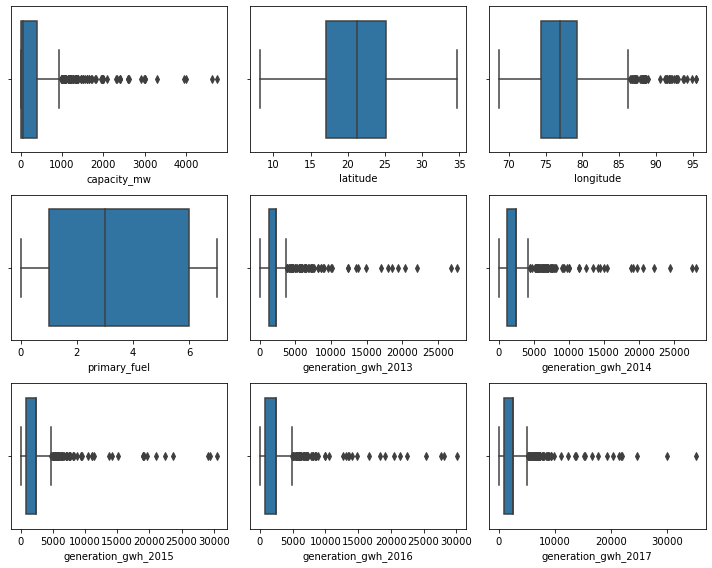

In [26]:
plt.figure(figsize=(10,8))
pn = 1
for column in df:
    if pn <= 9:
        ax = plt.subplot(3,3, pn)
        sns.boxplot(df[column])
        plt.xlabel(column)
    pn+=1
plt.tight_layout()

### Conclusion - All columns has outliers expect Primary_fuel and lattitude. So, I will deal with outliers with zscore technique.

In [27]:
df.shape

(908, 9)

In [28]:
## Importing the z-score and apply to the data set.
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold = 3
np.where(z<3)

(array([  0,   0,   0, ..., 907, 907, 907], dtype=int64),
 array([0, 1, 2, ..., 6, 7, 8], dtype=int64))

In [29]:
df_new = df[(z<3).all(axis=1)]
df_new.shape

(867, 9)

In [30]:
### Dataloss
data_loss= (908-867)/908*100
print("Data loss of the dataset", data_loss)

Data loss of the dataset 4.5154185022026425


### The loss of the data is acceptable and I am moving forward

## Seperating the dataset into the feature and target and importing the basic model building libraries 

In [31]:
x= df_new.drop(columns="primary_fuel")
y=df_new["primary_fuel"]

In [32]:
### Importing some preprocesing library for model 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [33]:
### Scaling then feature with standard scaler 
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [34]:
#### Splitting the dataset into traing data and testing data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.25, random_state=25)
print(len(x_train), len(y_train), len(x_test), len(y_test))

650 650 217 217


In [35]:
### Importing the model building libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [36]:
### Importing the LogisticRegression and checking the score and cross validation score 
lr= LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
acc_lr =accuracy_score(y_test,pred_lr)
scr = cross_val_score(lr, x,y, cv=5)
Clas_r = classification_report(y_test,pred_lr)
con = confusion_matrix(y_test,pred_lr)
Corss_lr = scr.mean()

print("\n LogisticRegression Model Accuracy ",  '\nAccuracy_score for LogisticRegression model', acc_lr*100, "\n Cross Validation score is ",Corss_lr*100, '\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 LogisticRegression Model Accuracy  
Accuracy_score for LogisticRegression model 50.69124423963134 
 Cross Validation score is  49.479104378446614 
 Classification report is  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.69      0.57      0.62        58
           2       0.67      0.11      0.18        19
           3       0.55      0.59      0.57        51
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.42      0.71      0.53        34
           7       0.40      0.64      0.49        33

    accuracy                           0.51       217
   macro avg       0.34      0.33      0.30       217
weighted avg       0.50      0.51      0.47       217
 
 Confusion Metrix is 
 [[ 0  2  0  0  0  0  2 11]
 [ 0 33  1 10  0  0  7  7]
 [ 0  1  2 11  0  1  2  2]
 [ 0  4  0 30  0  0 10  7]
 [ 0  4  0  0  0  0  0  0]
 [ 0  0  0  

In [37]:
### Importing the RandomForestClassifier and  checking the score and cross validation score  
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
acc_RFC =accuracy_score(y_test,pred_RFC)
scr = cross_val_score(RFC, x_scaled,y, cv=5)
Corss_rfc = scr.mean()
Clas_r = classification_report(y_test,pred_RFC)
con = confusion_matrix(y_test,pred_RFC)

print("\n RandomForestClassifier Model Accuracy",  '\n\nAccuracy_score for RandomForestClassifier model', acc_RFC*100, "\n Cross Validation score is ",Corss_rfc*100, '\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 RandomForestClassifier Model Accuracy 

Accuracy_score for RandomForestClassifier model 69.12442396313364 
 Cross Validation score is  70.47372267623415 
 Classification report is  
               precision    recall  f1-score   support

           0       0.73      0.53      0.62        15
           1       0.67      0.81      0.73        58
           2       0.50      0.26      0.34        19
           3       0.71      0.80      0.75        51
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.78      0.74      0.76        34
           7       0.71      0.73      0.72        33

    accuracy                           0.69       217
   macro avg       0.51      0.48      0.49       217
weighted avg       0.67      0.69      0.67       217
 
 Confusion Metrix is 
 [[ 8  4  0  2  0  0  1  0]
 [ 2 47  3  4  0  0  0  2]
 [ 1  5  5  6  0  2  0  0]
 [ 0  3  0 41  0  0  2  5]
 [ 0  4  0  0  0  0  0  0]
 [ 0 

In [38]:
### Importing the DecisionTreeClassifier and checking the score and cross validation score  
DTC= DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred_DTC=DTC.predict(x_test)
acc_DTC =accuracy_score(y_test,pred_DTC)
scr = cross_val_score(DTC, x_scaled,y, cv=5)
Corss_dtc = scr.mean()
Clas_r = classification_report(y_test,pred_DTC)
con = confusion_matrix(y_test,pred_DTC)

print("\n DecisionTreeClassifier Model Accuracy",  '\n\nAccuracy_score for DecisionTreeClassifier model', acc_DTC*100, "\n Cross Validation score is ",Corss_dtc*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 DecisionTreeClassifier Model Accuracy 

Accuracy_score for DecisionTreeClassifier model 67.2811059907834 
 Cross Validation score is  64.93056939738224 
 Classification report is  
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.71      0.72      0.72        58
           2       0.57      0.42      0.48        19
           3       0.69      0.82      0.75        51
           4       0.00      0.00      0.00         4
           5       1.00      0.33      0.50         3
           6       0.72      0.62      0.67        34
           7       0.57      0.70      0.63        33

    accuracy                           0.67       217
   macro avg       0.63      0.53      0.55       217
weighted avg       0.67      0.67      0.66       217
 
 Confusion Metrix is 
 [[ 9  3  0  1  0  0  1  1]
 [ 1 42  4  5  1  0  1  4]
 [ 1  6  8  3  0  0  0  1]
 [ 1  3  0 42  0  0  1  4]
 [ 0  3  0  1  0  0  0  0]
 [ 0  

In [39]:
### Importing the KNeighborsClassifier and checking the score and cross validation score 
KNC= KNeighborsClassifier()
KNC.fit(x_train,y_train)
pred_KNC=KNC.predict(x_test)
acc_KNC =accuracy_score(y_test,pred_KNC)
scr = cross_val_score(KNC, x_scaled,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_KNC)
con = confusion_matrix(y_test,pred_KNC)
print("\n KNeighborsClassifier Model Accuracy",  '\n\nAccuracy_score for KNeighborsClassifier model', acc_KNC*100, "\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 KNeighborsClassifier Model Accuracy 

Accuracy_score for KNeighborsClassifier model 65.43778801843318 
 Cross Validation score is  64.69536907846654 
 Classification report is  
               precision    recall  f1-score   support

           0       0.38      0.53      0.44        15
           1       0.72      0.76      0.74        58
           2       0.67      0.42      0.52        19
           3       0.69      0.78      0.73        51
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.69      0.59      0.63        34
           7       0.67      0.67      0.67        33

    accuracy                           0.65       217
   macro avg       0.48      0.47      0.47       217
weighted avg       0.65      0.65      0.65       217
 
 Confusion Metrix is 
 [[ 8  2  0  0  0  0  5  0]
 [ 3 44  2  6  0  1  2  0]
 [ 1  3  8  4  0  2  1  0]
 [ 3  2  1 40  0  0  0  5]
 [ 0  3  0  0  0  0  1  0]
 [ 0  0  

In [40]:
### Importing the SVC and checking the score and cross validation score
svc= SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
acc_svc =accuracy_score(y_test,pred_svc)
scr = cross_val_score(svc, x_scaled,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_svc)
con = confusion_matrix(y_test,pred_svc)
print("\n SVC Model Accuracy",  '\n\nAccuracy_score for SVC model', acc_svc*100,"\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 SVC Model Accuracy 

Accuracy_score for SVC model 52.53456221198156 
 Cross Validation score is  55.00896950368747 
 Classification report is  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.56      0.60      0.58        58
           2       0.50      0.11      0.17        19
           3       0.61      0.67      0.64        51
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.58      0.65      0.61        34
           7       0.38      0.64      0.48        33

    accuracy                           0.53       217
   macro avg       0.33      0.33      0.31       217
weighted avg       0.48      0.53      0.49       217
 
 Confusion Metrix is 
 [[ 0  2  0  0  0  0  2 11]
 [ 0 35  2  8  0  0  6  7]
 [ 0  2  2 11  0  1  1  2]
 [ 0  9  0 34  0  0  0  8]
 [ 0  4  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  6  0  0  0

### I performed 5 model prediction Accuracy score, those score are mentioned below - 


#### Accuracy score and cross validation score for LogisticRegression model 50.69124423963134  and cross validation score is 49.479104378446614 
#### Accuracy score cross validation score for RandomForestClassifier model 67.2811059907834  and cross validation score is 70.01195933824995 
#### Accuracy score cross validation score for DecisionTreeClassifier model 66.3594470046083  and cross validation score is 63.777157663942596
#### Accuracy score cross validation score for KNeighborsClassifier model 65.43778801843318  and cross validation score is 64.69536907846654
#### Accuracy score cross validation score  for SVC model 52.53456221198156  and cross validation score is 55.00896950368747

### From the above, I conclude that I will go forward with KNeighborsClassifier because the accuracy is good compariosn to other model and aslo has very low difference in Cross validation score but we can do better hyperparameter tuning with KNeighborsClassifier. May the Accuracy will increase.


In [41]:
from sklearn.model_selection import GridSearchCV
Knn= KNeighborsClassifier()
param_grid = {"algorithm":['kd_tree', 'brute'],
            'leaf_size':[10,11,13,14,15],
            'n_neighbors':[3,5,7,9,11,13,15,17]}

In [42]:
gridsearch = GridSearchCV(estimator=Knn, param_grid=param_grid)
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [10, 11, 13, 14, 15],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]})

In [43]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 3}

In [44]:
knn = KNeighborsClassifier(algorithm='kd_tree', leaf_size= 10, n_neighbors=5)

In [45]:
### Importing the KNeighborsClassifier and checking the score and cross validation score 
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
acc_knn=accuracy_score(y_test,pred_knn)
scr = cross_val_score(knn, x_scaled,y, cv=5)
Corss = scr.mean()
Clas_r = classification_report(y_test,pred_knn)
con = confusion_matrix(y_test,pred_knn)
print("\n KNeighborsClassifier Model Accuracy",  '\n\nAccuracy_score for KNeighborsClassifier model', acc_knn*100, "\n Cross Validation score is ",Corss*100,'\n Classification report is ', '\n' ,Clas_r, '\n Confusion Metrix is', '\n', con)


 KNeighborsClassifier Model Accuracy 

Accuracy_score for KNeighborsClassifier model 65.43778801843318 
 Cross Validation score is  64.69536907846654 
 Classification report is  
               precision    recall  f1-score   support

           0       0.38      0.53      0.44        15
           1       0.72      0.76      0.74        58
           2       0.67      0.42      0.52        19
           3       0.69      0.78      0.73        51
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.69      0.59      0.63        34
           7       0.67      0.67      0.67        33

    accuracy                           0.65       217
   macro avg       0.48      0.47      0.47       217
weighted avg       0.65      0.65      0.65       217
 
 Confusion Metrix is 
 [[ 8  2  0  0  0  0  5  0]
 [ 3 44  2  6  0  1  2  0]
 [ 1  3  8  4  0  2  1  0]
 [ 3  2  1 40  0  0  0  5]
 [ 0  3  0  0  0  0  1  0]
 [ 0  0  

### Conclusion- I tried to change parameter multiple times but did not get better score. So, I will keep the model without hyperparameter tuning which scored 65%. Which is good.

## Saving the model

In [46]:
import joblib
joblib.dump(Knn, 'Global Power Plant Database_primary_fuel')

['Global Power Plant Database_primary_fuel']

# Moving to predicted the capacity_mw

### As we already did all dataset cleaning and dataset analysis for classification. So, I dont need to perform all the step, only perform the necessary step for building regression model.

In [47]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,7,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


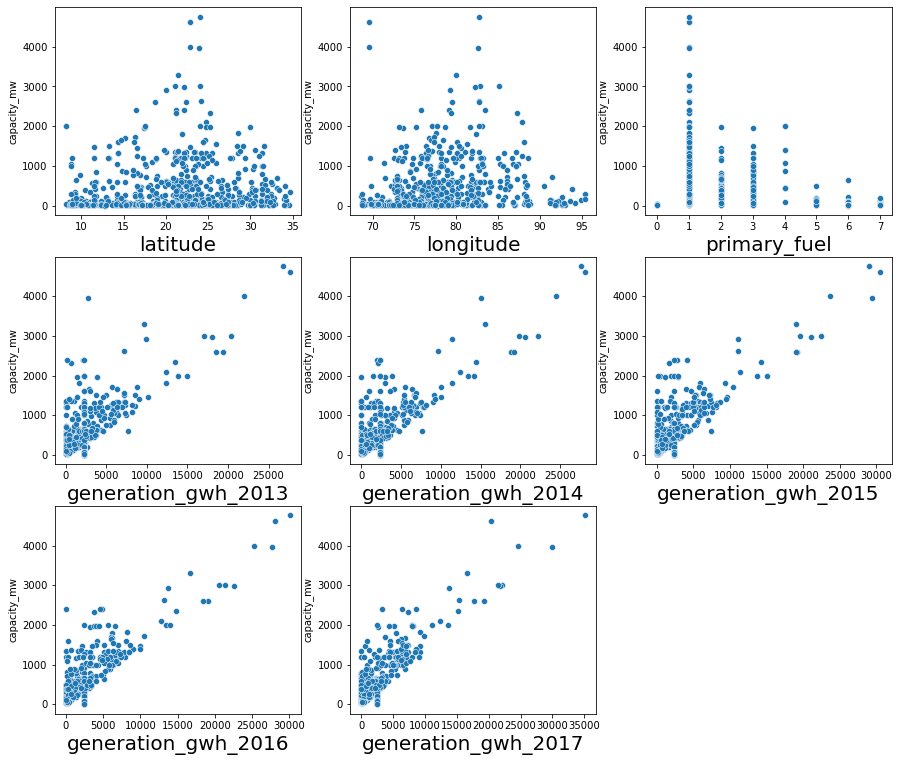

In [48]:
### Chechking the relation between target and feature 

x= df.drop(columns='capacity_mw')
y=df["capacity_mw"]
plt.figure(figsize=(15,13))
pn=1
for column in x:
    if pn <= 9:
        ax= plt.subplot(3,3, pn)
        sns.scatterplot(x[column],y)
        plt.xlabel(column, fontsize= 20)
    pn+=1
plt.show()

## Conclusion -

#### capacity_mw has normal trend with latitude.
#### capacity_mw has normal trend with longitude.
#### capacity_mw  has normal trend with primary_fuel.
#### capacity_mw has good trend with generation_gwh_2013.
#### capacity_mw has good trend with generation_gwh_2014.
#### capacity_mw has good trend with generation_gwh_2015.
#### capacity_mw has good trend with generation_gwh_2016.
#### capacity_mw has good trend with generation_gwh_2017.

### I can say from above conclusion that all the feature has goor trend with capacity_mw . 

## Multicollinearity

<function matplotlib.pyplot.show(close=None, block=None)>

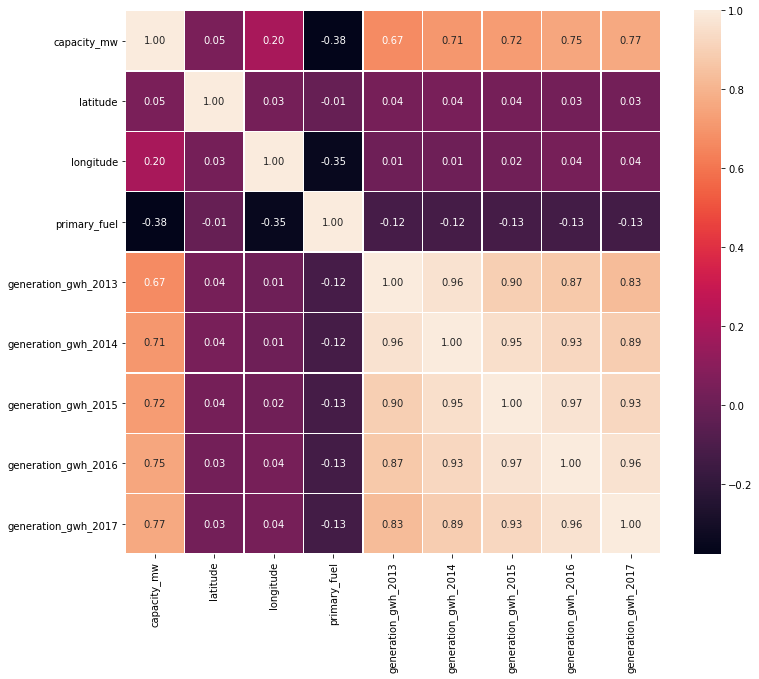

In [49]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

### generation_gwh_2014,generation_gwh_2015,generation_gwh_2016 and generation_gwh_2017 has multicollinearity with each other with more than 90%but  I can not drop the column as there are only 9 feature are available for model building. 

### The target has maximum trend with - Generation_gwh_2017(77%)
### The target has minimum trend with - Lattitude(0.5%)

### Generation_gwh_2017 has good trend with target and more feature has multicollinearity with eachother but I will keep all feature for Model building as there are less number of feature I have in dataset.

### Checking the distribution of the dataset again

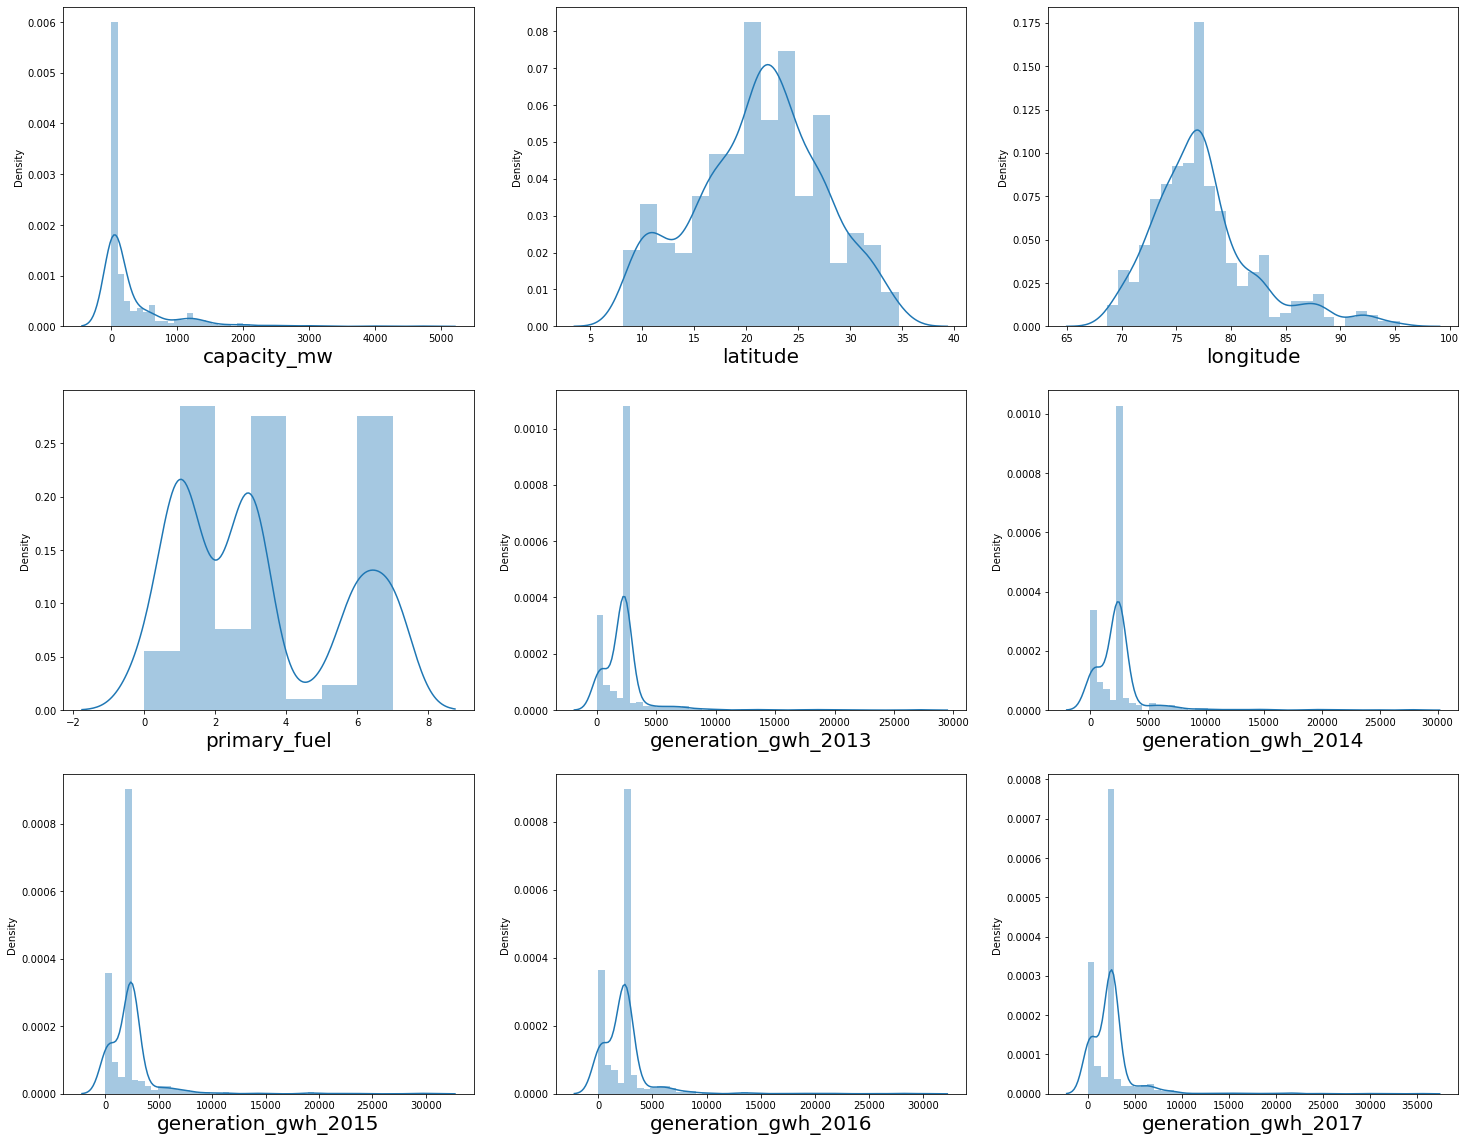

In [50]:
plt.figure(figsize=(25,20))
pn=1
for column in df:
    if pn <= 9:
        plt.subplot(3,3, pn)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize= 20)
    pn+=1
plt.show()

## Conclusion -

#### capacity_mw has normal distribution but right skewed.
#### latitude has good distribution.
#### longitude has good distribution.
#### Primary fuel is categorical values
#### generation_gwh_2013 has normal distribution but right skewed.
#### generation_gwh_2014 has normal distribution but right skewed.
#### generation_gwh_2015 has normal distribution but right skewed.
#### generation_gwh_2016 has normal distribution but right skewed.
#### generation_gwh_2017 has normal distribution but right skewed.

### I can say from above conclusion that all the feature has normal distribution but has some skewness which i can deal in skewness handling

In [51]:
x.skew().sort_values()

latitude              -0.147391
primary_fuel           0.471141
longitude              1.129836
generation_gwh_2014    5.041961
generation_gwh_2016    5.071758
generation_gwh_2017    5.111938
generation_gwh_2013    5.241491
generation_gwh_2015    5.367370
dtype: float64

In [52]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

x=pd.DataFrame(x_new, columns=x.columns)

In [53]:
x.skew().sort_values()

latitude              -0.074872
primary_fuel          -0.047088
longitude              0.002419
generation_gwh_2017    0.013392
generation_gwh_2016    0.038668
generation_gwh_2015    0.070937
generation_gwh_2014    0.124543
generation_gwh_2013    0.180340
dtype: float64

### Now the skewness is removed. Now I can move forward and check the stats of the model


## Outliers

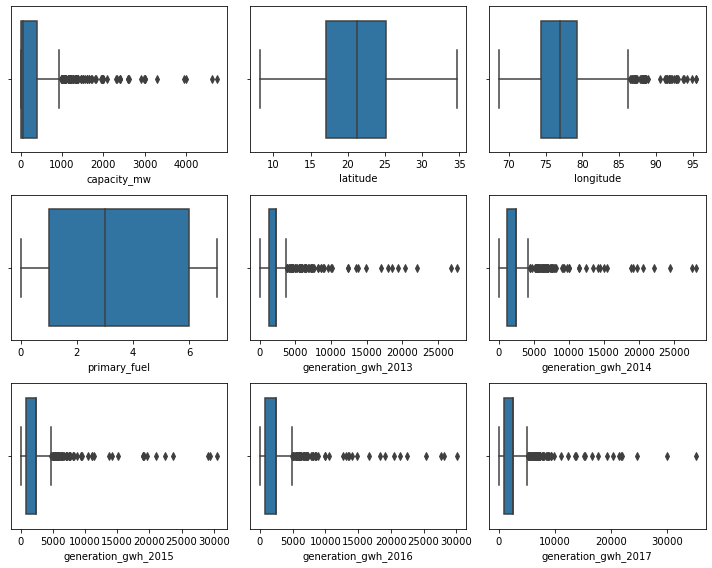

In [54]:
plt.figure(figsize=(10,8))
pn = 1
for column in df:
    if pn <= 9:
        ax = plt.subplot(3,3, pn)
        sns.boxplot(df[column])
        plt.xlabel(column)
    pn+=1
plt.tight_layout()

### Conclusion - Only 4 feature has outlires which is not that much that we can work on that, rest of all features has not any outlier. So,we do not need to remome these outliers because thes outliers wil be the obvious.

In [55]:
df.shape

(908, 9)

In [56]:
## Importing the z-score and apply to the data set.
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold = 3
np.where(z<3)

(array([  0,   0,   0, ..., 907, 907, 907], dtype=int64),
 array([0, 1, 2, ..., 6, 7, 8], dtype=int64))

In [57]:
df_new = df[(z<3).all(axis=1)]
df_new.shape

(867, 9)

In [58]:
### Dataloss
data_loss= (908-867)/908*100
print("Data loss of the dataset", data_loss)

Data loss of the dataset 4.5154185022026425


### The Dataloss is acceptable

### Seprating the feature and target

In [59]:
x= df_new.drop(columns="capacity_mw")
y=df_new["capacity_mw"]

In [60]:
### Scaling the features with standard scaler 
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [61]:
#### Splitting the dataset into traing data and testing data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.25, random_state=25)
print(len(x_train), len(y_train), len(x_test), len(y_test))

650 650 217 217


In [62]:
### Importing the libraries for model building.
from sklearn.metrics import r2_score, plot_roc_curve, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [63]:
### Importing the LinearRegression and checking the r2 score, cross validation and errors
lr= LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
r2_lr =r2_score(y_test,pred_lr)
scr = cross_val_score(lr, x,y, cv=5)
Corss_lr = scr.mean()
mae_lr = mean_absolute_error(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)
rmse_lr = np.sqrt(mse_lr)
print("\t\t\t LinearRegression Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for LinearRegression model', r2_lr*100, '\n Cross Validation score ', Corss_lr*100, '\nMean_absolute_error', mae_lr,"\nMean_squared_error", mse_lr, '\nRoot mean_squared_error', rmse_lr )

			 LinearRegression Model Accuracy and r2 score, cross validation and errors 

R2 score for LinearRegression model 24.238488649355805 
 Cross Validation score  39.08869522040456 
Mean_absolute_error 223.44568476347933 
Mean_squared_error 90721.53773058634 
Root mean_squared_error 301.20016223532537


In [64]:
### Importing the DecisionTreeRegressor and checking the score and r2 score, cross validation and errors
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)
r2_DTR =r2_score(y_test,pred_DTR)
scr = cross_val_score(DTR, x_scaled,y, cv=5)
Corss_DTR = scr.mean()
mae_DTR = mean_absolute_error(y_test,pred_DTR)
mse_DTR = mean_squared_error(y_test,pred_DTR)
rmse_DTR = np.sqrt(mse_DTR)

print("\t\t\t DecisionTreeRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for DecisionTreeRegressor model', r2_DTR*100, '\n Cross Validation score ', Corss_DTR*100, '\nMean_absolute_error', mae_DTR,"\nMean_squared_error", mse_DTR, '\nRoot mean_squared_error', rmse_DTR )

			 DecisionTreeRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for DecisionTreeRegressor model 38.3922134801063 
 Cross Validation score  57.96528070585998 
Mean_absolute_error 113.9844039938556 
Mean_squared_error 73772.9888121473 
Root mean_squared_error 271.61183481606116


In [65]:
### Importing the RandomForestRegressor and checking the score and r2 score
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
r2_RFR =r2_score(y_test,pred_RFR)
scr = cross_val_score(RFR, x_scaled,y, cv=5)
Corss_RFR = scr.mean()
mae_RFR = mean_absolute_error(y_test,pred_RFR)
mse_RFR = mean_squared_error(y_test,pred_RFR)
rmse_RFR = np.sqrt(mse_RFR)

print("\t\t\t RandomForestRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for RandomForestRegressor model', r2_RFR*100, '\n Cross Validation score ', Corss_RFR*100, '\nMean_absolute_error', mae_RFR,"\nMean_squared_error", mse_RFR, '\nRoot mean_squared_error', rmse_RFR )

			 RandomForestRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for RandomForestRegressor model 69.2406960554312 
 Cross Validation score  77.30886445621006 
Mean_absolute_error 92.14752448629902 
Mean_squared_error 36833.1003912852 
Root mean_squared_error 191.9195153997769


In [66]:
### Importing the KNeighborsRegressor and checking the score and r2 score
KNN= KNeighborsRegressor()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
r2_KNN =r2_score(y_test,pred_KNN)
scr = cross_val_score(KNN, x_scaled,y, cv=5)
Corss_KNN = scr.mean()
mae_KNN = mean_absolute_error(y_test,pred_KNN)
mse_KNN = mean_squared_error(y_test,pred_KNN)
rmse_KNN = np.sqrt(mse_KNN)

print("\t\t\t KNeighborsRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for KNeighborsRegressor model', r2_KNN*100, '\n Cross Validation score ', Corss_KNN*100, '\nMean_absolute_error', mae_KNN,"\nMean_squared_error", mse_KNN, '\nRoot mean_squared_error', rmse_KNN)

			 KNeighborsRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for KNeighborsRegressor model 75.64155543361163 
 Cross Validation score  71.30436363446361 
Mean_absolute_error 87.96952258064516 
Mean_squared_error 29168.31394189456 
Root mean_squared_error 170.7873354259459


In [67]:
### Importing the SupportVectorRegressor and checking the score and r2 score
svr= SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
r2_svr=r2_score(y_test,pred_svr)
scr = cross_val_score(svr, x_scaled,y, cv=5)
Corss_svr = scr.mean()
mae_svr = mean_absolute_error(y_test,pred_svr)
mse_svr = mean_squared_error(y_test,pred_svr)
rmse_svr = np.sqrt(mse_svr)
print("\t\t\t SupportVectorRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for SupportVectorRegressor model', r2_svr*100, '\n Cross Validation score -', Corss_svr*100, '\nMean_absolute_error', mae_svr,"\nMean_squared_error", mse_svr, '\nRoot mean_squared_error', rmse_svr)

			 SupportVectorRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for SupportVectorRegressor model -10.129515004012092 
 Cross Validation score - -16.975735759942296 
Mean_absolute_error 183.23537190184214 
Mean_squared_error 131875.91921768998 
Root mean_squared_error 363.14724178725356


### I performed 5 model prediction Model Accuracy and r2 score, cross validation and errors are mentioned below - 

#### Accuracy score and cross validation score for LinearRegression model 24.238488649355805  and cross validation score is 39.08869522040456 
#### Accuracy score cross validation score for DecisionTreeRegressor model 44.61538533148348   and cross validation score is 56.85953250194664 
#### Accuracy score cross validation score for RandomForestRegressor model 67.83438227247827  and cross validation score is 77.11609350378956  
#### Accuracy score cross validation score for KNeighborsRegressor model 75.64155543361163  and cross validation score is 71.30436363446361
#### Accuracy score cross validation score  for SupportVectorRegressor model -10.129515004012092   and cross validation score is -16.975735759942296 

### From the above, I conclude that I will go forward with KNeighborsRegressor because the accuracy is normal but the diffrence betweem R2_score and Cross validation is very less compariosn to other model and aslo has very low difference in Cross validation score but we can do better hyperparameter tuning with KNeighborsRegressor. May the Accuracy will increase.


In [68]:
Rnr = KNeighborsRegressor()
param_grid = {"algorithm":['kd_tree', 'brute'],
            'leaf_size':[10,11,13,14,15],
            'n_neighbors':[3,5,7,9,11,13,15,17]}

In [70]:
gridsearch= GridSearchCV(estimator=Rnr, param_grid=param_grid)
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [10, 11, 13, 14, 15],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]})

In [71]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 5}

In [72]:
knr = KNeighborsRegressor(algorithm='kd_tree', leaf_size= 15, n_neighbors=8)

In [73]:
knr.fit(x_train,y_train)
pred_knr=knr.predict(x_test)
r2_knr =r2_score(y_test,pred_knr)
scr = cross_val_score(knr, x_scaled,y, cv=5)
Corss_knr = scr.mean()
mae_knr = mean_absolute_error(y_test,pred_knr)
mse_knr = mean_squared_error(y_test,pred_knr)
rmse_knr = np.sqrt(mse_knr)

print("\t\t\t KNeighborsRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for KNeighborsRegressor model', r2_knr*100, '\n Cross Validation score ', Corss_knr*100, '\nMean_absolute_error', mae_knr,"\nMean_squared_error", mse_knr, '\nRoot mean_squared_error', rmse_knr)

			 KNeighborsRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for KNeighborsRegressor model 76.4352953764925 
 Cross Validation score  68.9354511421808 
Mean_absolute_error 92.92009735023042 
Mean_squared_error 28217.84045090172 
Root mean_squared_error 167.98166700834267


## Conclusion 

### I tried very much to increase the R2 Score and decrease the difference between r2 score and cross validaion but did not get better result. So, I am going to save this model with KNeighborsRegressor model 75.64155543361163  and cross validation score is 71.30436363446361. 

### Saving the model

In [74]:
import joblib
joblib.dump(KNN, 'Global Power Plant Database_capacity_mw')

['Global Power Plant Database_capacity_mw']